# Практическая работа 2

## Задание 1

Найти и выгрузить многомерные данные (с большим количеством признаков – столбцов) с использованием библиотеки pandas. В отчёте описать найденные данные.


In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

url = 'https://raw.githubusercontent.com/N1ki0-0/dataPy/refs/heads/master/data/data_Statistics.csv'
df = pd.read_csv(url)

## Задание 2
Вывести информацию о данных при помощи методов .info(), .head(). Проверить данные на наличие пустых значений. В случае их наличия удалить данные строки или интерполировать пропущенные значения. При необходимости дополнительно предобработать данные для дальнейшей работы с ними.

In [4]:
df.info()
df.head()

missing_values = df.isnull().sum()
if missing_values.any():
    print("\nЕсть пропущенные значения, они будут удалены.")
    df = df.dropna()
else:
    print("\nПустых значений нет.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  87 non-null     object 
 1   Time of Day           87 non-null     object 
 2   Placed                87 non-null     int64  
 3   Mental State          87 non-null     object 
 4   Eliminations          87 non-null     int64  
 5   Assists               87 non-null     int64  
 6   Revives               87 non-null     int64  
 7   Accuracy              87 non-null     object 
 8   Hits                  87 non-null     int64  
 9   Head Shots            87 non-null     int64  
 10  Distance Traveled     87 non-null     float64
 11  Materials Gathered    87 non-null     int64  
 12  Materials Used        87 non-null     int64  
 13  Damage Taken          87 non-null     int64  
 14  Damage to Players     87 non-null     int64  
 15  Damage to Structures  87 

## Задание 3
Построить столбчатую диаграмму (.bar) с использованием модуля graph_objs из библиотеки Plotly

In [ ]:
x_values = df['Date']  
y_values = df['Eliminations']  


fig = go.Figure(data=[go.Bar(
    x=x_values,
    y=y_values,
    marker=dict(
        color=y_values,  
        coloraxis="coloraxis",  
        line=dict(color='black', width=2)
    )
)])

fig.update_layout(
    coloraxis=dict(colorscale='Viridis'),
)

fig.update_layout(
    title=dict(text='Количество ликвидаций по датам', x=0.5, font=dict(size=20)), 
    xaxis_title=dict(text='Дата', font=dict(size=16)),
    yaxis_title=dict(text='Ликвидации', font=dict(size=16)), 
    xaxis_tickangle=315,   
    xaxis=dict(tickfont=dict(size=14)),
    yaxis=dict(tickfont=dict(size=14)), 
    height=700,  
    width=1400,  
    xaxis_showgrid=True,  
    yaxis_showgrid=True,  
    xaxis_gridwidth=2,
    yaxis_gridwidth=2,
    xaxis_gridcolor='ivory',
    yaxis_gridcolor='ivory', 
    margin=dict(l=20, r=20, t=50, b=50)  
)

fig.show()


## Задание 4
Построить круговую диаграмму (go.Pie), использовав данные и стиль оформления из предыдущего графика. Сделать так, чтобы границы каждой доли были выделены чёрной линией с толщиной, равной 2 и категории круговой диаграммы были читаемы (к примеру, объединить часть объектов)

In [ ]:
grouped_data = df.groupby('Mental State').sum().reset_index()

fig = go.Figure(data=[go.Pie(
    labels=grouped_data['Mental State'],  
    values=grouped_data['Eliminations'],  
    marker=dict(
        line=dict(color='black', width=2)  
    ),
    textinfo='label+percent',  
    pull=[0.1 if val < 20 else 0 for val in grouped_data['Eliminations']]  
)])

fig.update_layout(
    title=dict(text='Ликвидации по психическому состоянию игроков', x=0.5, font=dict(size=20)), 
    height=700  
)

fig.show()


## Новый раздел

Matplotlib is building the font cache; this may take a moment.


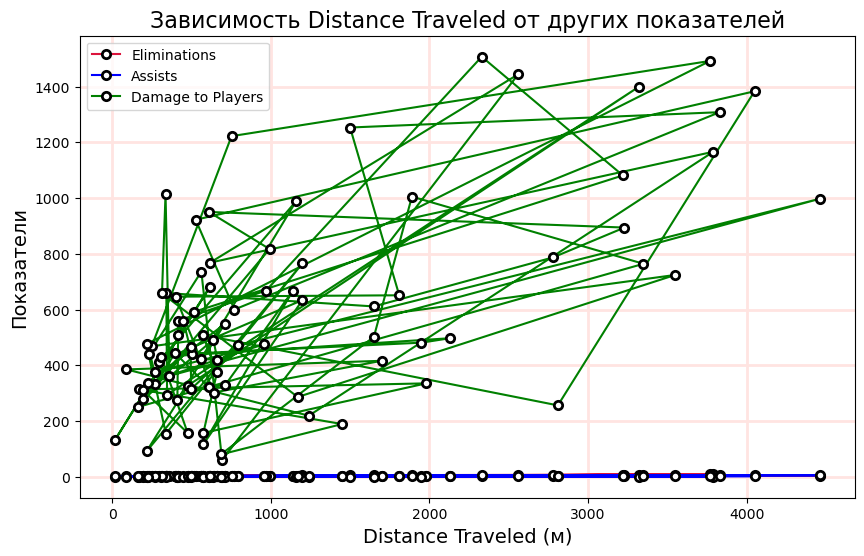

In [ ]:
import matplotlib.pyplot as plt

x_values = df['Distance Traveled']

y_values_1 = df['Eliminations']
y_values_2 = df['Assists']
y_values_3 = df['Damage to Players']

plt.figure(figsize=(10, 6))

plt.plot(x_values, y_values_1, label='Eliminations', color='crimson', marker='o',
         markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)

plt.plot(x_values, y_values_2, label='Assists', color='blue', marker='o',
         markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)

plt.plot(x_values, y_values_3, label='Damage to Players', color='green', marker='o',
         markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)

plt.title('Зависимость Distance Traveled от других показателей', fontsize=16)
plt.xlabel('Distance Traveled (м)', fontsize=14)
plt.ylabel('Показатели', fontsize=14)

plt.grid(True, linewidth=2, color='mistyrose')
plt.legend()
plt.show()


## Задание 6
Выполнить визуализацию многомерных данных, используя t-SNE. Необходимо использовать набор данных MNIST или fashion MNIST

In [12]:
pip install tensorflow

  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/332.0 MB 2.1 MB/s eta 0:02:41
   ---------------------------------------- 1.6/332.0 MB 3.0 MB/s eta 0:01:52
   ---------------------------------------- 2.1/332.0 MB 2.6 MB/s eta 0:02:07
   ---------------------------------------- 2.6/332.0 MB 2.9 MB/s eta 0:01:54
   ---------------------------------------- 3.1/332.0 MB 2.9 MB/s eta 0:01:53
    --------------------------------------- 4.2/332.0 MB 3.0 MB/s eta 0:01:51
    --------------------------------------- 4.7/332.0 MB 2.9 MB/s eta 0:01:52
    --------------------------------------- 5.2/332.0 MB 3.0 MB/s eta 0:01:50
    --------------------------------------- 6.0/332.0 MB 3.0 MB/s eta 0:01:47
    --------------------------------------- 6.6/332.0 MB 3.0 MB/s eta 0:01:5

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


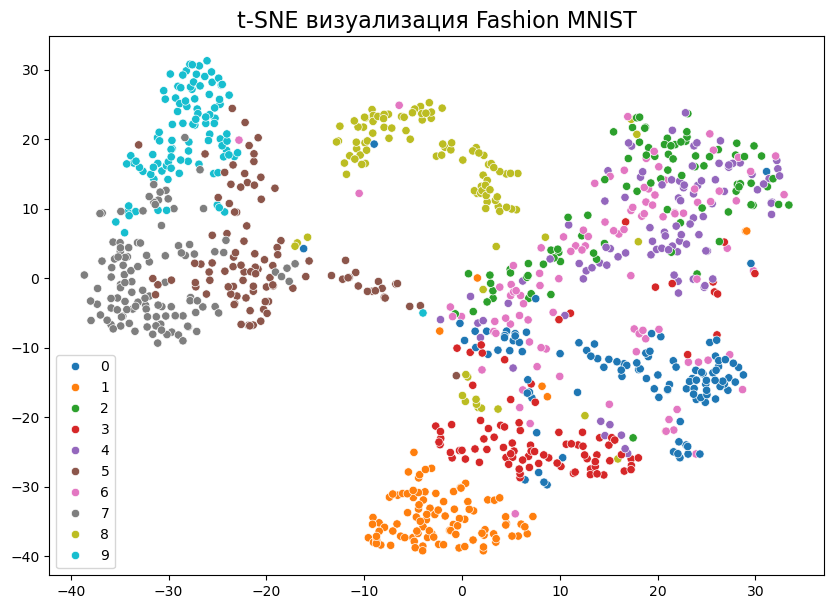

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train_flat = X_train.reshape(-1, 784)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_flat[:1000])  

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train[:1000], palette="tab10", legend='full')
plt.title("t-SNE визуализация Fashion MNIST", fontsize=16)
plt.show()


## Задание 7
Выполнить визуализацию многомерных данных, используя UMAP с различными параметрами n_neighbors и min_dist. Рассчитать время работы алгоритма с помощью библиотеки time и сравнить его с временем работы t-SNE.

In [9]:
pip install umap-learn


  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
Using cached pynndescent-0.5.13-py3-none-any.whl (56 kB)

   ---------------------------------------- 0/2 [pynndescent]
   -------------------- ------------------- 1/2 [umap-learn]
   ---------------------------------------- 2/2 [umap-learn]



t-SNE выполнен за: 3.86 секунд


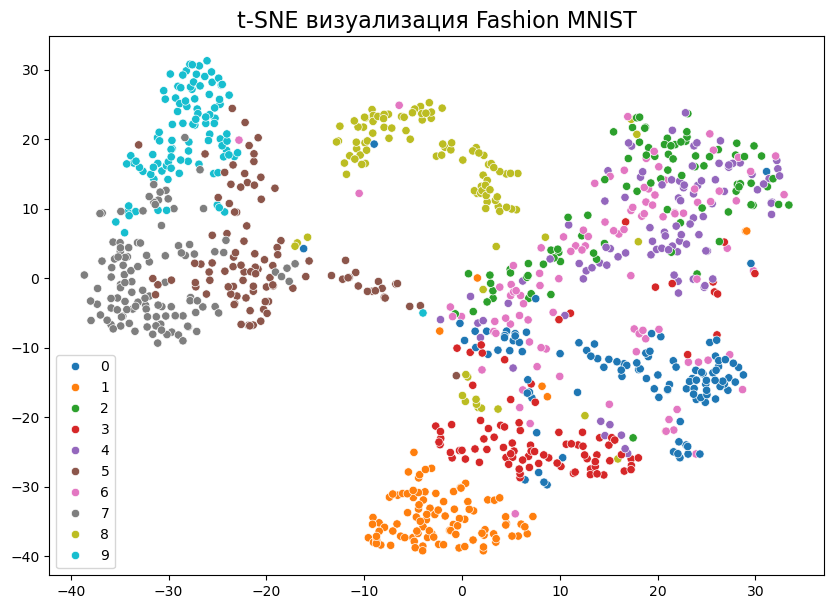

c:\Users\skori\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



UMAP выполнен за: 39.18 секунд


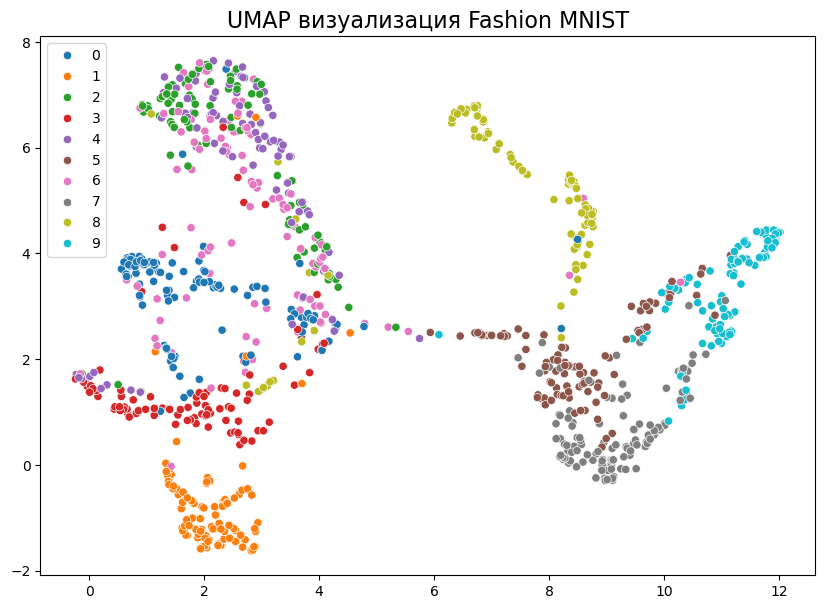

Время выполнения t-SNE: 3.86 секунд
Время выполнения UMAP: 39.18 секунд


In [ ]:
import time
import umap

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train_flat = X_train.reshape(-1, 784)

X_sample = X_train_flat[:1000]
y_sample = y_train[:1000]

def plot_embedding(embedding, labels, title):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=labels, palette="tab10", legend='full')
    plt.title(title, fontsize=16)
    plt.show()

#1 Визуализация с использованием t-SNE
start_time = time.time()
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_sample)
tsne_time = time.time() - start_time
print(f"t-SNE выполнен за: {tsne_time:.2f} секунд")

plot_embedding(X_tsne, y_sample, "t-SNE визуализация Fashion MNIST")

#2 Визуализация с использованием UMAP
start_time = time.time()
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_sample)
umap_time = time.time() - start_time
print(f"UMAP выполнен за: {umap_time:.2f} секунд")

plot_embedding(X_umap, y_sample, "UMAP визуализация Fashion MNIST")

print(f"Время выполнения t-SNE: {tsne_time:.2f} секунд")
print(f"Время выполнения UMAP: {umap_time:.2f} секунд")
